## Mann-Whitney Test

Alternative of Independent sample t-test for Non parametric test

In [1]:
female_response_times = [34,36,41,43,44,37]
male_response_times = [45,33,35,39,42]

In [2]:
from scipy.stats import mannwhitneyu

In [4]:
result = mannwhitneyu(female_response_times,male_response_times)
result

MannwhitneyuResult(statistic=16.0, pvalue=0.9307359307359306)

In [5]:
alpha=0.05
if result.pvalue< alpha:
    print ("We reject Null Hypothesis")
    print("Conclusion: There is significant difference in response time.")
else:
      print ("We fail to reject Null Hypothesis")
      print("Conclusion: There is significant difference in response time.")

We fail to reject Null Hypothesis
Conclusion: There is significant difference in response time.


## Kruskal-Wallis Test

In [4]:
import pandas as pd 
df = pd.read_csv('vaccine-antibodies.csv')
df.head()

,Vaccine,antibodies(ug/ml)
0,A,1232
1,A,751
2,A,339
3,A,848
4,A,447


In [5]:
df.Vaccine.unique()

array(['A', 'B', 'C'], dtype=object)

In [6]:
a = df.loc[df.Vaccine == 'A']['antibodies(ug/ml)']
b = df.loc[df.Vaccine == 'B']['antibodies(ug/ml)']
c = df.loc[df.Vaccine == 'C']['antibodies(ug/ml)']

In [7]:
from scipy.stats import kruskal

In [8]:
result = kruskal(a,b,c)
result

KruskalResult(statistic=7.298245614035082, pvalue=0.02601393801711558)

In [9]:
if result.pvalue < 0.05:
    print("The p-value < 0.05, indicating significant differences among groups")
else:
    print("The p-value > 0.05, indicating no significant differences among groups")


The p-value < 0.05, indicating significant differences among groups


In [10]:
df.columns

Index(['Vaccine', 'antibodies(ug/ml)'], dtype='object')

In [11]:
#!pip install seaborn
import seaborn as sns


<Axes: xlabel='Vaccine', ylabel='antibodies(ug/ml)'>

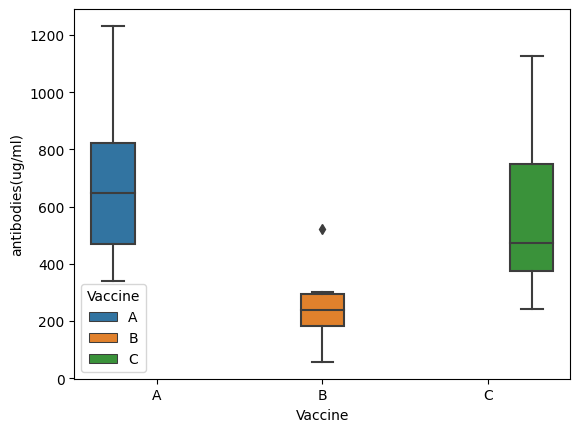

In [14]:
sns.boxplot(x = 'Vaccine', y = 'antibodies(ug/ml)',data=df, hue = 'Vaccine')

In [13]:
from scikit_posthocs import posthoc_dunn
pvalues = posthoc_dunn(df, val_col =  'antibodies(ug/ml)', group_col = 'Vaccine')
pvalues

,A,B,C
A,1.000000,0.009444,0.516412
B,0.009444,1.000000,0.051576
C,0.516412,0.051576,1.000000


In [15]:
pvalues<0.05

,A,B,C
A,False,True,False
B,True,False,False
C,False,False,False


## Chi-Square Test

In [19]:
import seaborn as sns

In [23]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
H0 = "There is no relationship between sex and smoking."
H1 = "There is significant relationship between sex and smoking."

In [26]:
alpha = 0.05

In [27]:
# create contingency table 
import pandas as pd 
table = pd.crosstab(df['sex'],df['smoker'])
table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [28]:
table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [30]:
from scipy.stats import chi2_contingency

In [36]:
result = chi2_contingency(table.values)
result

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [38]:
alpha = 0.05
if result.pvalue< alpha:
    print("we reject H0")
    print(f"Conclusion: {H0}")
else:
    print("We fail to reject H0")
    print(f"Conclusion : {H0}")

We fail to reject H0
Conclusion : There is no relationship between sex and smoking.
